## Predict house prices: regression
- Dataset: the Boston housing prices dataset
    + examples and features
    + labels
- Normalize features
- Create the model
- Train the model
- Predict
- Conclusion 

### 문제정의: Boston의 집값의 중앙값 예측
- Regression 문제 : continuous value

In [10]:
from __future__ import absolute_import, division, print_function
import sys
import tensorflow as tf
from tensorflow import keras

import numpy as np

print('Tensorflow version: {}'.format(tf.__version__))
print('Keras version: {}:'.format(keras.__version__))
print('Pythoon version: {}:'.format(sys.version))

Tensorflow version: 1.11.0
Keras version: 2.1.6-tf:
Pythoon version: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]:


In [12]:
# Download Boston housing prices dataset
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [13]:
#shuffle the training set 
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [14]:
# row(examples), column(features)
print("Training set: {}".format(train_data.shape)) 
print("Testing set:  {}".format(test_data.shape))

Training set: (404, 13)
Testing set:  (102, 13)


In [15]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


The dataset contains 13 different features:
1. Per capita crime rate. 
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.

In [19]:
import pandas as pd
columns_names = ['CRIME', 'ZONE_25000', 'Non-retail', 'C_river', 'Nitric', 'Room', 'Age', 'Dis', 
                'Rad', 'Tax', 'PT ratio', 'Black', 'LowStatus_people']

df = pd.DataFrame(train_data, columns=columns_names)
df.head(10)

,CRIME,ZONE_25000,Non-retail,C_river,Nitric,Room,Age,Dis,Rad,Tax,PT ratio,Black,LowStatus_people
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
5,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
6,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
7,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
8,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
9,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47


### Labels 
- house price in thousands of dollars

In [18]:
print(train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


### Normalize features
- Normalize features that use different scales and ranges
- 정규분포
- normalization을 하지 않으면, training을 더 어렵게하고 model은 입력에 사용 된 단위의 선택에 더 의존하게 된다.

In [20]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_date = (test_data - mean) / std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


### Create the model

In [21]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape = (train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    #Configures the model for training.
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [22]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 ==0: print(epoch)
        print('.', end='')
Epochs = 500

# Store train status
history = model.fit(train_data, train_labels, epochs=Epochs,
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])

0
....................................................................................................100
....................................................................................................200
....................................................................................................300
....................................................................................................400
....................................................................................................

### Visualize the model
- model's training progress (using `history` object)
- 이 과정을 통해 모델이 train을 멈추기 전에 train할 시간을 결정하고자 한다. 

In [23]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
            label = 'Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

### Update `model.fit` for early stopping
- Automatically stop training when the validation score doesn't improve 
- `callbacks` :  test a training condition for every epoch
- epoch이 개선되지 않으면 자동으로 training 종료

0
....................................................................................................100
............................................

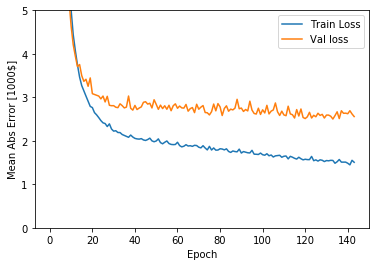

In [24]:
model = build_model()
# patience = 20 : epoch이 20이상 val_loss가 줄어들지 않는 경우 early_stoppiing
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=Epochs,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])

plot_history(history)

In [26]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae ))

Testing set Mean Abs Error: $2227.42


### Predict 

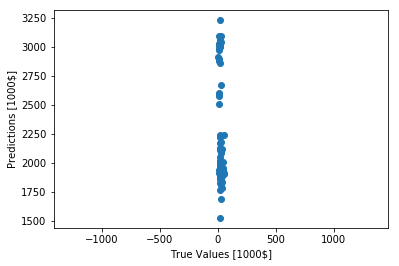

In [28]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

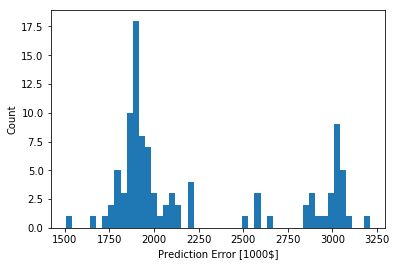

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")